# Adverse Childhood Experiences (ACEs) of Adults in CA 

In this analysis notebook, I will be using the cleaned data set from my initial exploration of adults in CA who indicated at least 1 type of ACE before the age of 18.

I hope to perhaps find interesting trends in how the reported rates of those with ACEs have changed throughout the years, and see if this is another factor that I can account for in my data story that discusses mental health in CA.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
adverse_df = pd.read_csv('../data/Cleaned/ACEs_CLEANED.csv')

In [3]:
adverse_df

,year,category,category_name,rate,lower_cl,upper_cl
0,2015,Total population,Total population,63.5,61.4,65.7
1,2015,Age,18 to 24 years,70.2,63.1,77.3
2,2015,Age,25 to 34 years,62.8,57.0,68.6
3,2015,Age,35 to 44 years,64.2,58.9,69.5
4,2015,Age,45 to 54 years,66.6,61.7,71.5
5,2015,Age,55 to 64 years,66.2,61.9,70.6
6,2015,Age,65 years and above,51.7,48.2,55.2
7,2015,Education,Less than high school,63.7,57.3,70.0
8,2015,Education,High school graduate,65.4,60.3,70.5
9,2015,Education,Some college,70.3,66.3,74.3


In [4]:
adverse_df.columns

Index(['year', 'category', 'category_name', 'rate', 'lower_cl', 'upper_cl'], dtype='object')

As a reminder, I'm working with years 2011, 2013, and 2015. The 'rate' column tells me the rate of adults in each identified category (row) who reported having at least 1 type of ACE in the past.

## Are there any historical trends among the categories?

I want to look at historical trends in the different rates of reported ACEs among the diverse categories in this data set. Therefore, I will use a groupby function to look at each year, each category that is then subdivided into category name, and the rate of each of those groups:

In [5]:
# Disaggregating by year, category, and category_name to make the data easier to comprehend:

adverse_df.groupby(['year','category','category_name'])['rate'].mean().to_frame()

rate
year category         category_name              
2011 Age              18 to 24 years         67.2
                      25 to 34 years         65.9
                      35 to 44 years         61.8
                      45 to 54 years         61.3
                      55 to 64 years         59.8
                      65 years and above     49.3
     Education        College graduate       53.3
                      High school graduate   65.8
                      Less than high school  63.7
                      Some college           67.6
     Health Insurance Medi-Cal               65.6
                      Other Public           58.6
                      Private                57.7
                      Uninsured              69.5
     Sex              Female                 59.8
                      Male                   62.3
     Total population Total population       61.0
2013 Age              18 to 24 years         66.4
                      25 to 34 years         67.6
                      35 to 44 years         69.3
                      45 to 54 years         67.7
                      55 to 64 years         63.4
                      65 years and above     47.8
     Education        College graduate       56.1
                      High school graduate   68.7
                      Less than high school  69.1
                      Some college           68.4
     Health Insurance Medi-Cal               72.1
                      Other Public            NaN
                      Private                61.2
                      Uninsured              66.0
     Sex              Female                 64.6
                      Male                   62.8
     Total population Total population       63.7
2015 Age              18 to 24 years         70.2
                      25 to 34 years         62.8
                      35 to 44 years         64.2
                      45 to 54 years         66.6
                      55 to 64 years         66.2
                      65 years and above     51.7
     Education        College graduate       58.3
                      High school graduate   65.4
                      Less than high school  63.7
                      Some college           70.3
     Health Insurance Medi-Cal               70.2
                      Other Public           57.6
                      Private                63.4
                      Uninsured              66.7
     Sex              Female                 62.0
                      Male                   65.1
     Total population Total population       63.5

Observations:

* Since I'm mostly interested in learning about any trends for ACEs among different age groups, I will focus on that. It looks like in 2011, the range of the rates for having ACEs is 49.3% among 65+ year-olds to 67.2% among the youngest age group, 18-24 years of age. In this year, the 55-64 age group that I'm concerned with reported a rate of 59.8%.
* In 2013, the 55-64 age group rate of ACEs increased to 63.4%.
* Finally, in 2015, this rate yet again increased to 66.2%, overall showing an increase in respondents among the 55-64 age group that indicated having at least 1 type of ACE.
* It is worth noting that in the Total population's rate of indicating ACEs started at 61% in 2011, then went up to 63.7% in 2013, and ultimately stayed relatively steady at a slightly lower 63.5% in 2015. This means that the entire population of those who responded did not indicate a big increase in the reported rate of ACEs.

## Are there differences in the reported rates of ACEs among age groups?

Next, I want to dive deeper into the data among age groups, so I will create an age filter that will help me focus only on this age category:

In [6]:
# Creating a filter for age:

age_filter = adverse_df['category'] == 'Age'

age_adverse_df = adverse_df[age_filter]

age_grouped = age_adverse_df.groupby(['year', 'category_name'])['rate'].sum().unstack()

age_grouped

category_name,18 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and above
year,,,,,,
2011,67.2,65.9,61.8,61.3,59.8,49.3
2013,66.4,67.6,69.3,67.7,63.4,47.8
2015,70.2,62.8,64.2,66.6,66.2,51.7


Observations:

* For age groups other than the 55-64 year olds, from year to year they mostly increased but also saw some decreases. For example, with the 18-24 age group, although their overall reported rate of those who had ACEs increased (67.2% to 70.2%), they still had a very small decrease from 2011 to 2013 (67.2% down to 66.4%). We see this similar trend with the 65+ year olds.
* The 55-64 age group rate of adults who indicated having at least 1 type of ACE increased by the largest amount, going from 59.8 to 66.2 overall.
* One thing to note is that our other data sets have 18-34 age range, whereas this one divided it into 2, with 18-24 and 25-34. I'm going to take the averages of these 2 for each year:

In [7]:
# Taking the average of the first two columns for 2011:

(67.2 + 65.9) / 2

66.55000000000001

In [8]:
# Average between 18-24 and 25-34 for 2013:

(66.4 + 67.6) / 2

67.0

In [9]:
# Average between 18-24 and 25-34 for 2015:

(70.2 + 62.8) / 2

66.5

I like looking at visual data, so let's try looking at a line plot:

Text(0, 0.5, 'Percent')

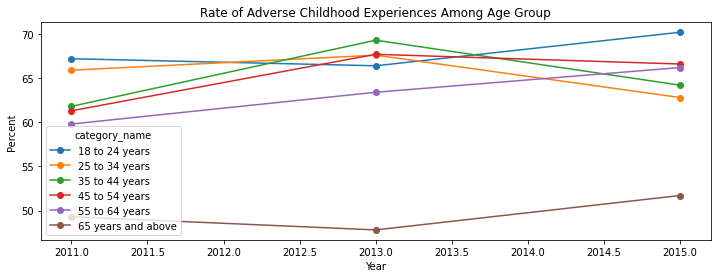

In [10]:
# Making a line plot:

age_grouped.plot(kind='line', figsize=(12,4), style='-o')
plt.title('Rate of Adverse Childhood Experiences Among Age Group')
plt.xlabel('Year')
plt.ylabel('Percent')

To re-emphasize, the rate of people who indicated having an adverse childhood experience has generally increased for 55 to 64 year olds.

Thus, this data analysis was helpful for me to find yet another social determinant that could play a potential role in  the overall mental health or depression rates among age groups in CA. The purpose of this analysis is to help cultivate my data story that focuses on all the diverse factors and behaviors that could influence mental health, so this data set has helped me identify Adverse Childhood Experiences as a possible factor that I can bring to the audience's attention.

The only limitation is that, in contrast to the other data sets I have, this data on ACEs only has information for three years: 2011, 2013, and 2015. Therefore, I will have to remember to use only these years when comparing this data to the depression rates.

## The "End Goal" I'm Hoping to Accomplish:

What I'm hoping to achieve is to create a data frame that shows which sociocultural, behavioral factors (out of the ones I've found data on) relate to depression rates. I'm envisioning, at the end of all my data analysis, in the last notebook of this analysis folder, I can round up all the data trends for each of the factors I've analyzed, and create a table that has age groups (18-34, 35-44, 45-54, 55-64, and 65+) and each factor as the columns (depending on which will give me meaningful insights to discuss in my story.

For each row (age group), what will go in these columns is a simple description: +, o, -

If there's a -, this means that there was a decrease in the factor's trend over time.

If there's a o, this means that there was no change in the trend over time.

If there's a +, this will either represent an increasing trend (for example, with the ACEs data, I would put a '+' for the 35-44,  45-54, 55-64, and 65+ age groups) or a high average compared to the other age groups. This is what I'm hoping will make my data analysis easiest to understand: to put it in simplest form, I'm showing the audience which of the factors I've analyzed has meaningful insights that can connect to why 55-64 age range in particular experienced highest depression rates from 2012 to 2018.

With that, let's move on to the next analysis notebook! Thank you!